In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
set_style='whitegrid'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading loan data
loan_data = pd.read_csv('.\loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Inspecting Data Part

In [3]:
# information of data
loan_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# shape of data
loan_data.shape 

(39717, 111)

In [5]:
# column names
loan_data.columns 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
# description of data
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning Part

In [7]:
# column-wise null value count
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# row-wise null value count
loan_data.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [9]:
# percentage of column-wise null values
round((loan_data.isnull().sum())/len(loan_data),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

* As we can see there are few columns which have 100% null values. So, first delete such columns

In [10]:
# columns with more than 50% null values
columns_with_50_nans = loan_data.columns[round((loan_data.isnull().sum())/len(loan_data),2)*100 >= 50]
columns_with_50_nans

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [11]:
# dropping columns_with_50nans
loan = loan_data.drop(columns_with_50_nans, axis=1)
print(loan.shape)

(39717, 54)


* After removing columns having more than 50% nulls values, only 54 columns left.

In [12]:
round((loan.isnull().sum())/len(loan),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

* After removing column with more than 50% nan values. We hav a column 'desc' which describe why loan is taken with 33% nan values. So, we remove this column also.

In [13]:
# remove desc column
loan = loan.drop('desc',axis=1)

* There are few columns left with nan values but they can be ignored due to small amount of nan values

* Now let's check for rows having nan values

In [14]:
# checking rows for null values
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [15]:
# checking for rows having nan values more than 5
len(loan[loan.isnull().sum(axis=1) > 5])

0

* It's clear that rows don't have nan values more tha 5. So, there is no need of removing them

In [16]:
# getting information of data after removal of 58 columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

* As we see int_rate column is object type. First, change its data type to float and remove '%' sign

In [17]:
# data type of int_rate is changed to float and % sign is removed
loan['int_rate'] = loan['int_rate'].apply(lambda x:pd.to_numeric(x.strip('%')))
# data type is converted
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [18]:
loan['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

* emp_length contains employee's duration in company. But it is object type so convert it to integer type.
* First check for nan values and remove them. After it, change it's data type

In [19]:
loan['emp_length'].isnull().sum()
# there are 1075 null values.

1075

In [20]:
# remove null values from emp_length
loan = loan[~loan['emp_length'].isnull()]
loan['emp_length'].isnull().sum()
# they are removed.

0

In [21]:
# Now extract digit(numeric values) from emp_length column
# import regular expression which is helpful in finding digits from strings.
import re
loan['emp_length']=loan['emp_length'].apply(lambda x:re.findall('\d+', str(x))[0])
# re.findall() is used to search for “all” occurrences that matches a given pattern
# \d means any number which is followed by + means one or more occurrences
loan['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [22]:
# Now change it's data type
loan['emp_length'] = pd.to_numeric(loan['emp_length'])
loan['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

# Data analysis part

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.) 
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

* Behaviour variables are not available to us at the time of loan given. So, these will be not used for default prediction

In [23]:
# remove attributes showing behaviour of customers
loandf = loan.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                  'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 
                  'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
                  'last_pymnt_amnt', 'last_credit_pull_d', 'application_type'], axis=1)
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [24]:
# remove attributes like title, url which are not useful during analysis
loandf = loandf.drop(['title', 'url', 'zip_code', 'addr_state'],axis=1)
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

* Let's look at target variable viz. loan_status. We need to replace it's values with binary digit viz. 1 and 0. 1:- Person is defaulted, 0:- Person is not defaulted

In [25]:
# check the entries of loan_status variable
loandf['loan_status'].head(10)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object

As we see there are three type of entries such as 'Fully Paid', 'Charged Off' and 'Current'. Here:-
1. **Fully Paid** :- Paid in full means that you have completed all of your loan payments, including both the principal balance and any interest that has accrued
2. **Charged Off** :- When you haven't paid on an account for 6 months to a year, creditors will often mark the account as a “charge off”.
3. **Current** :- When an account is current, there is either no payment due right now because you've recently made a payment, or the only payment due now is the minimum payment for the current month

In [26]:
# categorise values in three types and their values 
loandf['loan_status'] = loandf['loan_status'].astype('category')
loandf['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

* Here we see that most people had paid the payment. Now, replace fully paid with 0 and charged off 1 and remove the entries of current beacuse they are not the part of analysis

In [27]:
# replacing fully paid with 0 and charged off with 1
loandf['loan_status'] = loandf['loan_status'].str.replace('Fully Paid', '0')
loandf['loan_status'] = loandf['loan_status'].str.replace('Charged Off', '1')

In [28]:
# remove current loan status
loandf = loandf[loandf['loan_status'] != 'Current']

# change it's data type to numeric
loandf['loan_status'] = loandf['loan_status'].apply(lambda x:pd.to_numeric(x))

In [29]:
# entries checked
loandf['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

* loan_status is replaced with 1 and 0. Let's start visualising data

## Univariate Analysis

In [30]:
# check the deafault rate
round(np.mean(loandf['loan_status'])*100,2)

14.38

The overall default rate is 14.38%

Let's start visualising data across categorical variables

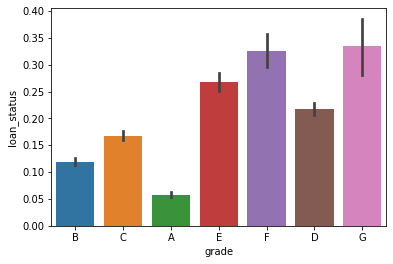

In [31]:
# plot default rate against grade to check the grade provided by LC
sns.barplot(x=loandf['grade'], y=loandf['loan_status'])

* Default rate of F and G grade is approximately equal whereas A grade has lowest default rate

In [32]:
# define a function to plot categorical variables against loan_status
def plot_catvar(variable):
    sns.barplot(x=variable, y='loan_status', data=loandf)

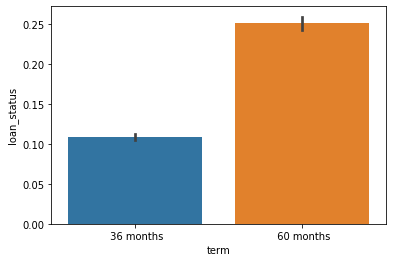

In [33]:
# plot the number of payments on the loan against default rate
plot_catvar('term')

* 60 months time period has max default rate as compared to 36 months

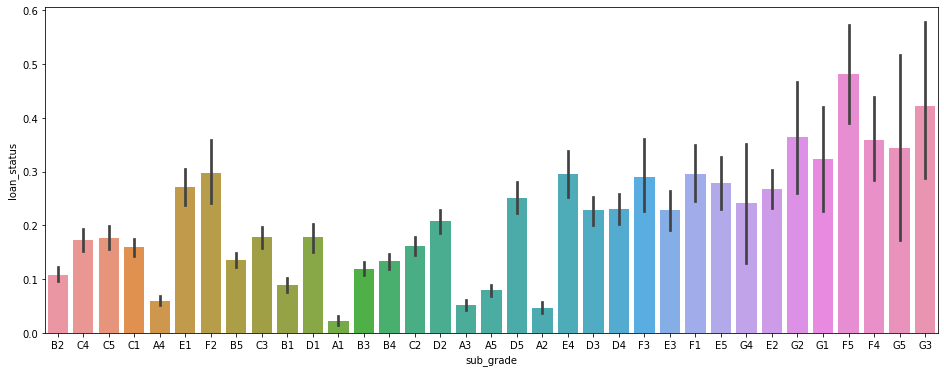

In [34]:
# plot to ckeck default rate against sub-grade provided by LC
plt.figure(figsize=(16, 6))
plot_catvar('sub_grade')

* F5 sub-grade has the highest default rate as compared to others whereas A1 has the lowest default rate among them

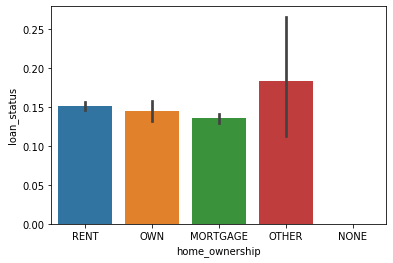

In [35]:
# plot default rate against home ownership
plot_catvar('home_ownership')

* Other type has the highest default rate whereas mortgage type home has the lowest default rate

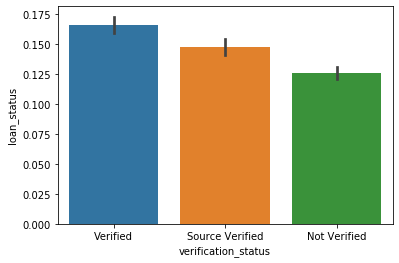

In [36]:
# plot default rate against verification status to check whether income is verified or not
plot_catvar('verification_status')

* Verified has the highest default rate wheras not verified has the lowest default rate

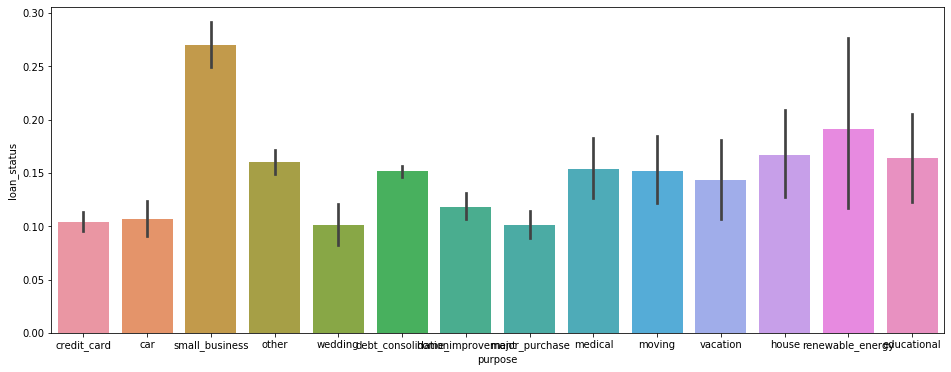

In [37]:
# plot default rate against purpose to check for what purpose loan was taken
plt.figure(figsize=(16, 6))
plot_catvar('purpose')

* Loan taken for small business purpose has the highest default rate.
* Credit card and car purpose have nearly equal default rate.

In [38]:
#let's convert issue date into datetime data type from object type
loandf['issue_d'] = pd.to_datetime(loandf['issue_d'], format='%b-%y')
loandf['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [39]:
# extract month and year from issue date
loandf['month'] = loandf['issue_d'].apply(lambda x: x.month)
loandf['year'] = loandf['issue_d'].apply(lambda x: x.year)

In [40]:
# check how many loan were given in each year
loandf.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [41]:
# check how many loan were given in each month
loandf.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

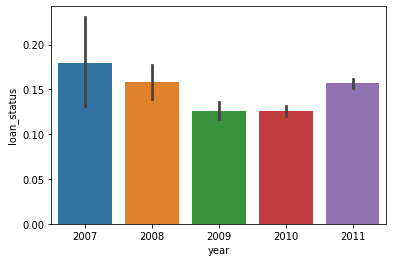

In [42]:
# plot default rate against year to check in which year more loans were given
plot_catvar('year')

* Loans which were given in 2007 has the highest default rate
* Default rate in year 2009 and 2007 is approximately equal and the lowest among all years

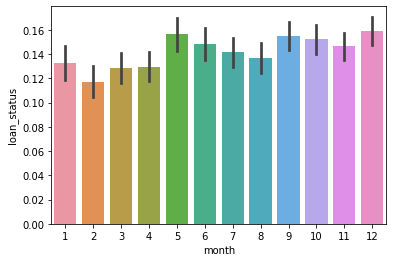

In [43]:
# plot default rate against month to check in which month more loans were given
plot_catvar('month')

* Default rate is the highest in the month of May, Sept, Oct and Dec and these are nearly equal to each other
* Default rate is the lowest in the month of Feb

Now analyse how default rate changes against continuous variable

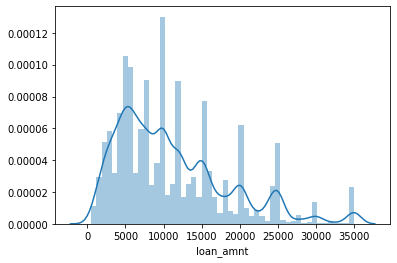

In [44]:
# plot loan amount 
sns.distplot(loandf['loan_amnt'])

Loan amount have outliers. Let's separate them into low, high, medium and very high amounts
* Convert all continuous variables into bins

In [45]:
# separating values into high and low
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loandf['loan_amnt'] = loandf['loan_amnt'].apply(lambda x: loan_amount(x))

In [46]:
# let's count the values category wise
loandf['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

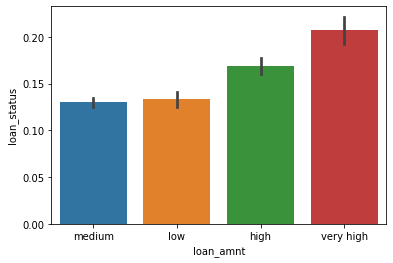

In [47]:
# plot default rate against loan_amnt categories
plot_catvar('loan_amnt')

* It is observed that as loan amount increases their default rate also increases.
* Loan amount less than 15000 has the lowest default rate

In [48]:
# let's convert funded amount inv into bins because it is a continuos variable
# funded amount inv contains the amount viz is committed by investors
loandf['funded_amnt_inv'] = loandf['funded_amnt_inv'].apply(lambda x: loan_amount(x))

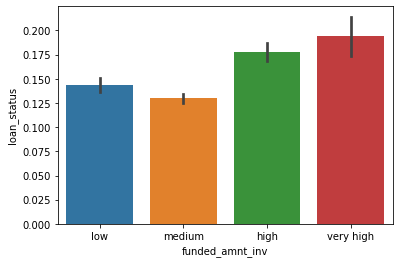

In [49]:
# plot default rate against funded amount inv
plot_catvar('funded_amnt_inv')

* It is observed that funded amount committed by investor has the highest default rate for above 15000 and below 5000
* There is less default rate for amount between 5000 to 15000

In [50]:
# convert interest rate into low,medium and high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loandf['int_rate'] = loandf['int_rate'].apply(lambda x: int_rate(x))

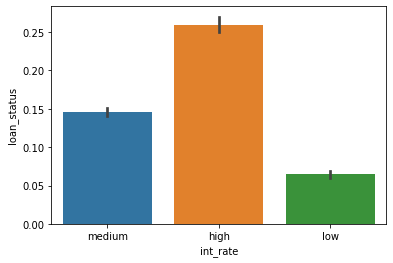

In [51]:
# plot default rate against interest rate
plot_catvar('int_rate')

* It is observed that as interest rate increases their default rate also increases
* Higher interest rate means higher chances of deafult than lower

In [52]:
# create debt income ratio to check that income affect to debt of a customer
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loandf['dti'] = loandf['dti'].apply(lambda x: dti(x))

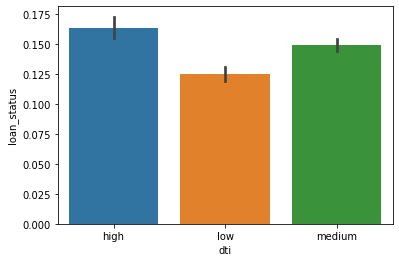

In [53]:
# plot default rate against debt income ratio
plot_catvar('dti')

* Higher the dti ratio higher their chance to get default

In [54]:
# let's convert funded amount into bins as it is also a continuous variable
# funded amount contains the amount funded by company
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
loandf['funded_amnt'] = loandf['funded_amnt'].apply(lambda x: funded_amount(x))

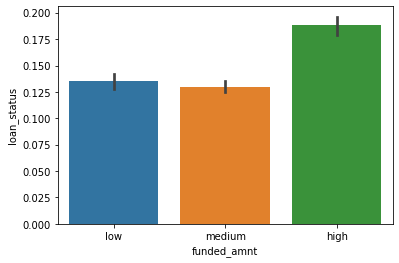

In [55]:
# plot default rate against funded amount
plot_catvar('funded_amnt')

* It is seen that funded amount more than 15000 has the highest default rate
* Default rate is nearly equal for funded amount less than 15000

In [56]:
# convert installment into bins
# installment contains detail that how much money is paid by customer per month for loan repay
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loandf['installment'] = loandf['installment'].apply(lambda x: installment(x))

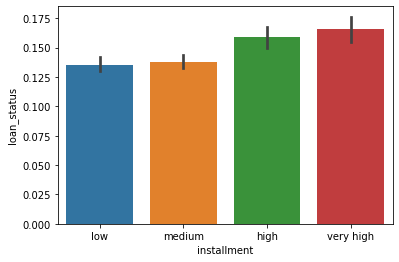

In [57]:
# plot default rate against installment
plot_catvar('installment')

* When installment increases default rate also increases respectively
* Default rate for installment less than 400 is approximately equal and lower than other

In [58]:
# convert annual income into bins
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loandf['annual_inc'] = loandf['annual_inc'].apply(lambda x: annual_income(x))

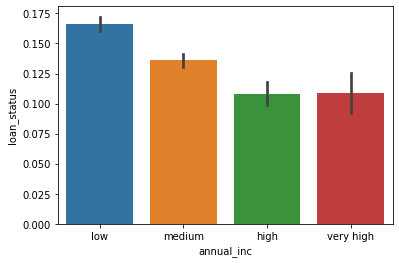

In [59]:
# plot default rate against income
plot_catvar('annual_inc')

* It is observed that if their annual income is high than there will be less chances of default
* Lower annual income has the highest default rate
* Income above 100000 has nearly equal and the lowest default rate

In [60]:
# covert employee length into bins
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loandf['emp_length'] = loandf['emp_length'].apply(lambda x: emp_length(x))

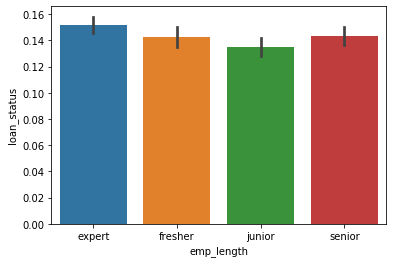

In [61]:
# plot default rate against employee length
plot_catvar('emp_length')

* Expert category of employee has the highest default rate whereas junior category has the lowest default rate

## Segmented Univariate Analysis

We have compared various variables against default rate and many insights are noted down. Now start segmented analysis by plotting purpose of loan because it plays vital role in credit industry

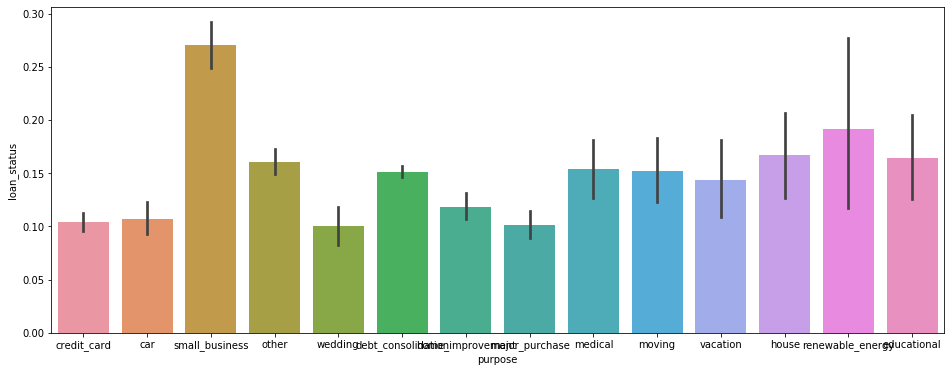

In [62]:
plt.figure(figsize=(16, 6))
# plot default rate against purpose of loan
plot_catvar('purpose')

* Loan taken for small business purpose has the highest default rate.
* Credit card and car purpose have nearly equal default rate.

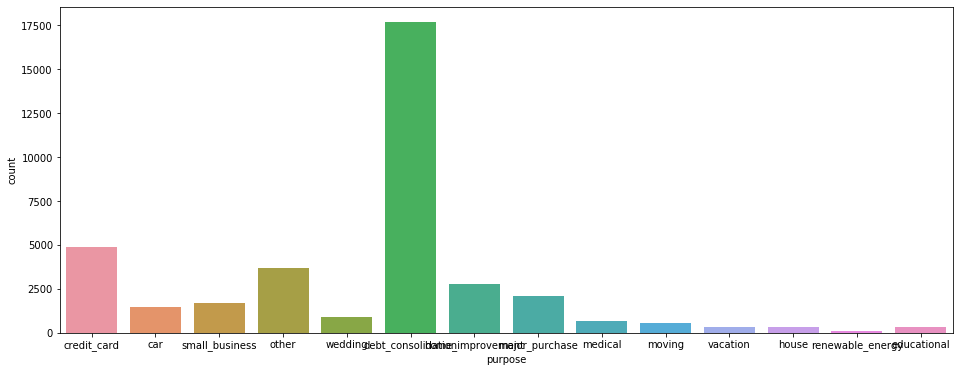

In [63]:
# let's check the number of loans for particular purpose
plt.figure(figsize=(16, 6))
sns.countplot(loandf['purpose'])

* Most of the loans were taken to repay their old loan as debt consolidation loan viz. approximately equal to 17500

In [64]:
# filter purpose for top 4 
top_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loandf = loandf[loandf['purpose'].isin(top_purposes)]
loandf['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

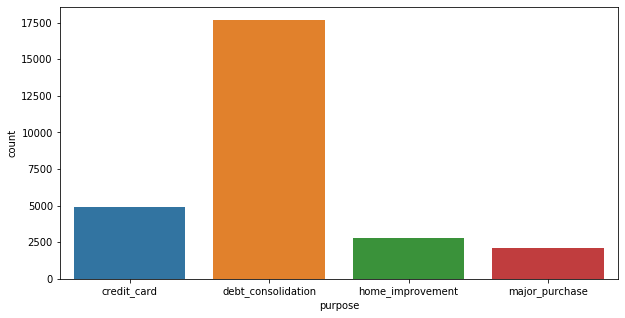

In [65]:
# number of loans in top 4 purposes
plt.figure(figsize=(10,5))
sns.countplot(loandf['purpose'])

* It is easily seen that debt consolidation purpose has more loans

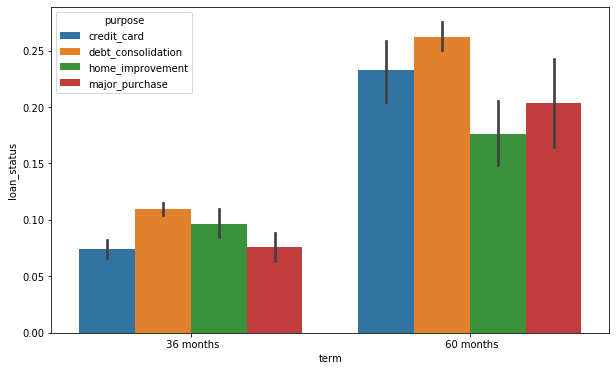

In [66]:
# plot default rate against term and purpose variables(both are categorical)
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y="loan_status", hue='purpose', data=loandf)

* It is observed that debt consolidation purpose has the highest default rate for both 36 and 60 months
* In 36 months: Credit card and major purchase has nearly equal and the lowest default rate
* In 60 months: home improvement purpose has the lowest default rate

In [67]:
# create a function for segmented analysis which plot purpose and default rate against other categorical variables
def plot_seg(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loandf)

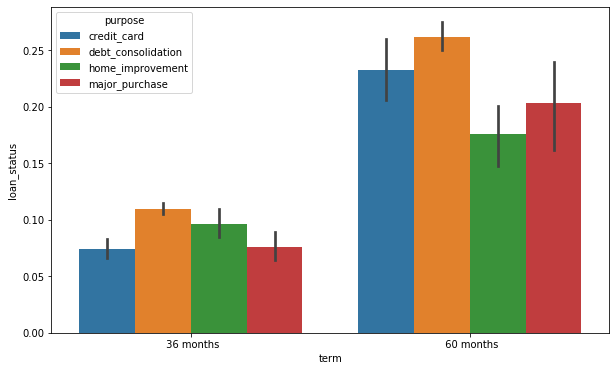

In [68]:
# plot term against default rate and purpose
plot_seg('term')

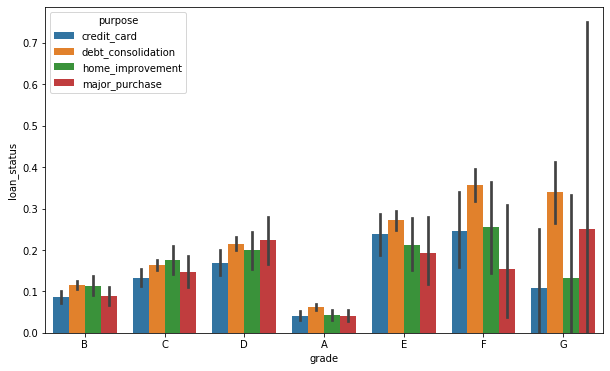

In [69]:
# plot grade against default rate and purpose
plot_seg('grade')

* In each grade debt consolidation purpose has the highest default rate except C and D grade
* In C grade home improvement purpose has the highest default rate
* In D grade major puschase has the highest default rate
* Credit card purpose has the lowest default rate except E grade
* In E grade major purchase has the lowest default rate

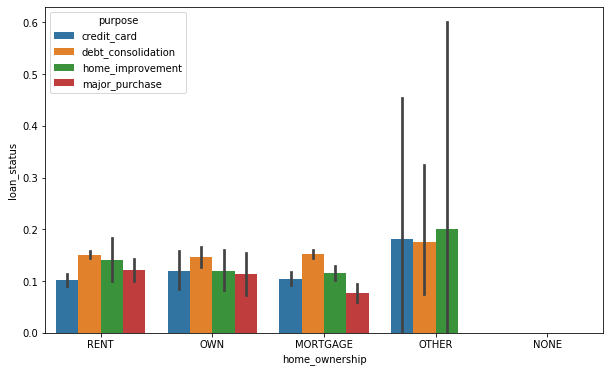

In [70]:
# plot home ownership against default rate and purpose
plot_seg('home_ownership')

* Debt consolidation purpose has the highest default rate except other type home ownership
* In other type, home ownership home improvement purpose has the highest default rate
* It is observed that there is zero default rate for major purchase purpose in other type home ownership
* Major purchase purpose has the lowest default rate except rent type home
* In rent type, credit card has the lowest default rate

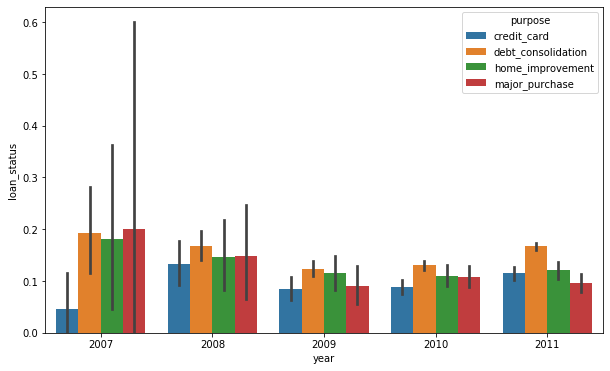

In [71]:
# plot year of loan against default rate and purpose
plot_seg('year')

* It is observed that debt consolidation purpose has the highest default rate in every year
* In 2007, debt consolidation and major purchase purpose has nearly equal default rate
* In 2008 and 2010, home improvement and major purchase purpose has nearly equal default rate
* Credit card has the lowest default rate in every year except 2011
* In 2011, major purchase has the lowest default rate

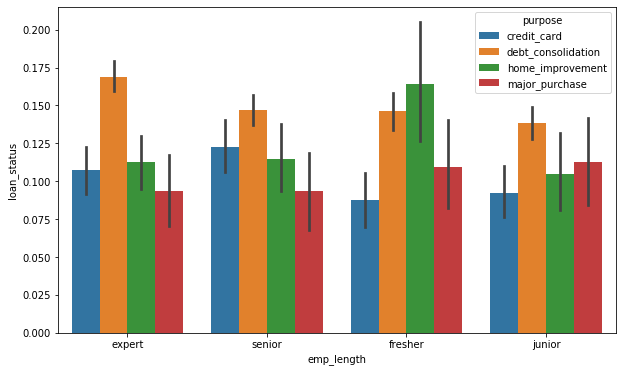

In [72]:
# plot employee length against default rate and purpose
plot_seg('emp_length')

* It is observed that debt consolidation purpose has the highest default rate except fresher category
* In fresher category, home improvement purpose has the highest default rate
* In expert and senior category, major purchase purpose has the lowest default rate
* In fresher and junior category, credit card has the lowest default rate

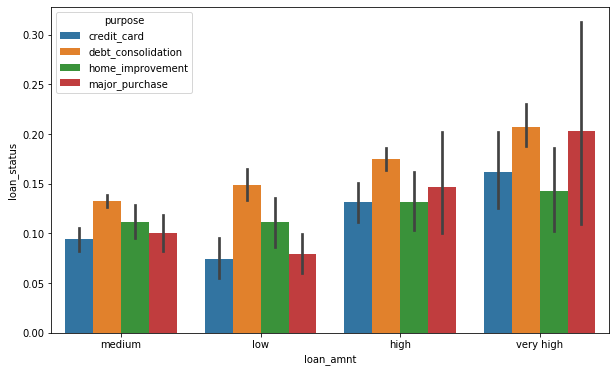

In [73]:
# plot loan amount against default rate and purpose
plot_seg('loan_amnt')

* Debt consolidation purpose has the highest default rate in every category
* Credit card purpose has the lowest default rate in every category except very high
* In very high, home improvement purpose has the lowest default rate

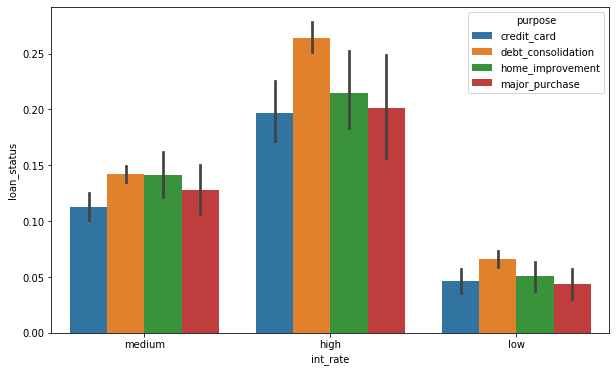

In [74]:
# plot interest rate against default rate and purpose
plot_seg('int_rate')

* Debt consolidation has the highest default rate in each type of interest rate
* In medium category, debt consolidation and home improvement purpose has nearly equal default rate
* Credit card has the lowest default rate in every category

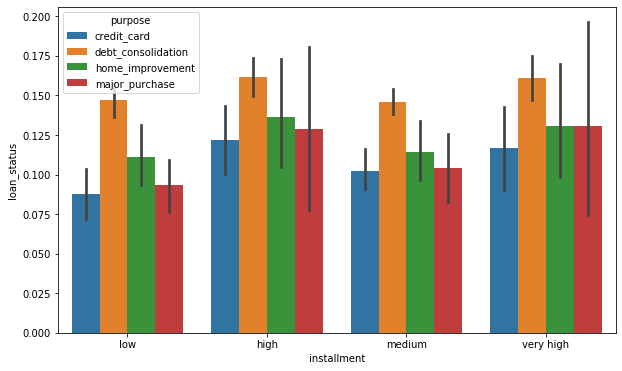

In [75]:
# plot installment against default rate and purpose
plot_seg('installment')

* Debt consolidation has the highest default rate for every category
* Credit card has the lowest default rate for every category

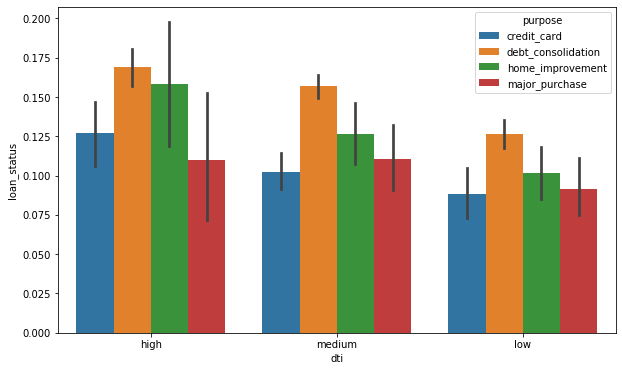

In [76]:
# plot debt income ratio against default rate and purpose
plot_seg('dti')

* It is observed that debt consolidation has the highest default rate
* Credit card has the lowest default rate except high category
* In high category, major purchase has the lowest default rate

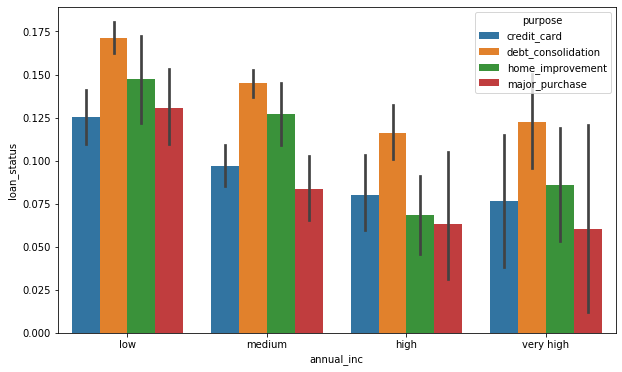

In [77]:
# plot annual income against default rate and purpose
plot_seg('annual_inc')

* It is seen that debt consolidation has the highest default rate for every category
* Major purchase has the lowest default rate for each category except low
* In low, credit card has the lowest default rate

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

In [78]:
# create function to check effect of variables on default rate
def def_rate(catvar):
    default_rates = loandf.groupby(catvar).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))
# it will calculate average default rate across various categorical variables 
# give difference b/w highest and lowest default rate as well

In [79]:
# let's check annual income
default_rates, diff = def_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [80]:
# filter loandf only for object datatype
catdf = loandf.loc[:, loandf.dtypes == object]
catdf['loan_status'] = loandf['loan_status']
print(catdf.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'dti', 'initial_list_status', 'loan_status'],
      dtype='object')


In [81]:
# getting diiference of default rates for each column
d = {key: def_rate(key)[1]*100 for key in catdf.columns if key != 'loan_status'}
d

{'loan_amnt': 7.000000000000001,
 'funded_amnt': 5.0,
 'funded_amnt_inv': 6.0,
 'term': 15.0,
 'int_rate': 19.0,
 'installment': 3.0,
 'grade': 27.0,
 'sub_grade': 46.0,
 'emp_title': 100.0,
 'emp_length': 2.0,
 'home_ownership': 16.0,
 'annual_inc': 6.0,
 'verification_status': 4.0,
 'pymnt_plan': 0.0,
 'purpose': 5.0,
 'dti': 5.0,
 'initial_list_status': 0.0}